## Environment Setup

In [1]:
#!pip install openpyxl

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


import sys
sys.path.insert (0, './_functions_/')
from functions_electric_cars import *

## Datasets

In [3]:
autos_2025 = pd.read_csv("./clean_data/autos_state_2025.csv")
population = pd.read_csv('./clean_data/population_states_stations.csv')


In [4]:

population_2025 = population.merge (autos_2025, on ="state", how = "left")

population_2025.to_csv('./clean_data/population_stations_cars.csv', index = False)
population_2025.head(5)


,state,inhabitants,area,population_density,number_of_charging_points,number_fast_charging_stations,number_regular_charging_stations,number_of_electric_cars,number_cars,number_non_electric_cars
0,Baden-Württemberg,11280257,3574785,316,93695,14271,79424,447516,8662899,8215383
1,Bayern,13369393,7054158,190,111983,19649,92334,508858,10907517,10398659
2,Berlin,3755251,89112,4214,18854,2325,16529,77486,1492346,1414860
3,Brandenburg,2573135,2965438,87,12340,2897,9443,57883,1891574,1833691
4,Bremen,684864,41961,1632,3969,537,3432,15280,349764,334484


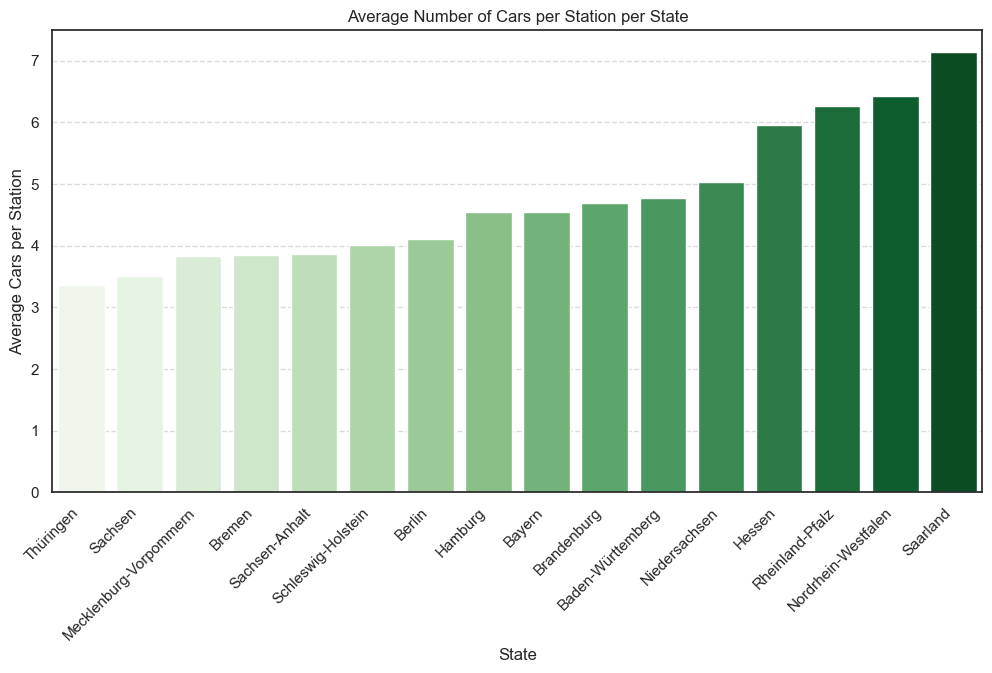

In [8]:
# Calculate the average cars per station
population_2025["cars_per_ev_station"] = population_2025["number_of_electric_cars"] / population_2025["number_of_charging_points"]

# Sort values for better visualization
df_sorted = population_2025.sort_values("cars_per_ev_station", ascending=True)

# Plot
plt.figure(figsize=(12, 6))

sns.barplot(x = "state", y = "cars_per_ev_station", data= df_sorted, palette = 'Greens')

plt.xlabel("State")
plt.ylabel("Average Cars per Station")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Average Number of Cars per Station per State")
plt.xticks(rotation=45, ha="right")
plt.show()


In [9]:
population_2025.to_csv('./clean_data/population_states_stations_2025.csv', index=False)